In [85]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import os
import cv2
import matplotlib.pyplot as plt
import PIL.Image as img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,GaussianNoise,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import optimizers

In [86]:
train_dir = 'C:/Users/Laukit/Downloads/Chest CT Scan/train/'
test_dir = 'C:/Users/Laukit/Downloads/Chest CT Scan/test/'
val_dir = 'C:/Users/Laukit/Downloads/Chest CT Scan/valid/'

In [87]:
IMAGE_SIZE=256
BATCH_SIZE=32

train_datagen = ImageDataGenerator(dtype='float32')
train_generator= train_datagen.flow_from_directory(train_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                shuffle=True,
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                shuffle=True,
                                                class_mode='categorical')


val_datagen = ImageDataGenerator(dtype='float32')
val_generator = val_datagen.flow_from_directory(val_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                shuffle=True,
                                                class_mode='categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [88]:
test_generator.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [11]:
VGG_model = VGG16(include_top=False, weights='imagenet', input_shape = (IMAGE_SIZE, IMAGE_SIZE,3))
for layer in VGG_model.layers:
    layer.trainable = False
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [12]:
model = Sequential()
model.add(VGG_model)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                 131076    
                                                                 
Total params: 14,845,764
Trainable params: 131,076
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy','AUC','Precision','Recall'])

In [14]:
history_res = model.fit(train_generator,
                            steps_per_epoch = 7,
                            epochs = 30,
                            validation_data = val_generator)

Epoch 1/30
7/7 [==============================] - 70s 10s/step - loss: 20.1419 - accuracy: 0.4330 - auc: 0.6444 - precision: 0.4330 - recall: 0.4330 - val_loss: 25.1306 - val_accuracy: 0.4722 - val_auc: 0.6462 - val_precision: 0.4722 - val_recall: 0.4722
Epoch 2/30
7/7 [==============================] - 72s 11s/step - loss: 12.8080 - accuracy: 0.6205 - auc: 0.7774 - precision: 0.6205 - recall: 0.6205 - val_loss: 12.5572 - val_accuracy: 0.6528 - val_auc: 0.7801 - val_precision: 0.6528 - val_recall: 0.6528
Epoch 3/30
7/7 [==============================] - 71s 10s/step - loss: 5.6071 - accuracy: 0.7679 - auc: 0.8708 - precision: 0.7679 - recall: 0.7679 - val_loss: 8.5182 - val_accuracy: 0.7222 - val_auc: 0.8236 - val_precision: 0.7222 - val_recall: 0.7222
Epoch 4/30
7/7 [==============================] - 64s 9s/step - loss: 1.8599 - accuracy: 0.9340 - auc: 0.9660 - precision: 0.9340 - recall: 0.9340 - val_loss: 4.8360 - val_accuracy: 0.7778 - val_auc: 0.8949 - val_precision: 0.7778 - val_

In [15]:
# Evaluate the model
model.evaluate(test_generator)

10/10 [==============================] - 85s 8s/step - loss: 6.7506 - accuracy: 0.7397 - auc: 0.8557 - precision: 0.7397 - recall: 0.7397


[6.750626087188721,
 0.7396825551986694,
 0.8557150959968567,
 0.7396825551986694,
 0.7396825551986694]

In [16]:
model.evaluate(train_generator)

20/20 [==============================] - 171s 9s/step - loss: 0.4368 - accuracy: 0.9837 - auc: 0.9934 - precision: 0.9837 - recall: 0.9837


[0.43682312965393066,
 0.9836868047714233,
 0.993377149105072,
 0.9836868047714233,
 0.9836868047714233]

In [17]:
model.evaluate(val_generator)

3/3 [==============================] - 20s 5s/step - loss: 7.1952 - accuracy: 0.7778 - auc: 0.8804 - precision: 0.7778 - recall: 0.7778


[7.195196151733398,
 0.7777777910232544,
 0.8804011940956116,
 0.7777777910232544,
 0.7777777910232544]

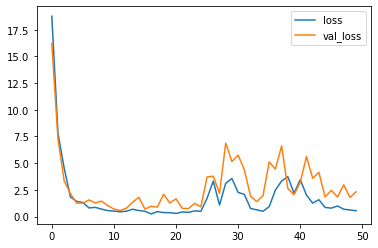

In [12]:
history_df = pd.DataFrame(history_res.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [77]:
# model.save('VGG_16_BestModel_chestCT.h5')
# print('Model Saved!')

Model Saved!


In [84]:
savedModel5=load_model('VGG_16_BestModel_chestCT.h5')
savedModel5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                 131076    
                                                                 
Total params: 14,845,764
Trainable params: 131,076
Non-trainable params: 14,714,688
_________________________________________________________________


[[9.9999619e-01 1.7623377e-18 0.0000000e+00 3.7711141e-06]]
THE UPLOADED IMAGE IS SUSPECTED AS: Adenocarcinoma


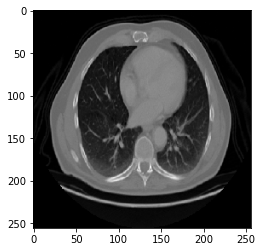

In [83]:
img = image.load_img('adenocarcinoma8.png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = savedModel5.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))  

In [18]:
test_generator.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}